# Prediction

# Preprocesamiento

### Build images

The images for the prediction process are generated in the same way but in this case, the masks are not going to be created.
In the prediction process, the size and the step-size must be the same to do not generate an overlap in the predicted results. However, there is no need that the images have the same size as the training images.

In [ ]:
!satproc_extract_chips     \
    ./data/dif_NBR_img/dif_nbr.tif \
    -o ./data/data_predict/800_800/ \
    --size 800 \
    --step-size 800 \
    --rescale \
    --rescale-mode percentiles \
    --upper-cut 98 --lower-cut 2 \


The **--aoi** option is useful to reduce the predicction area to some shapefile.

# Predict 

In [1]:
from fire.unet.predict import PredictConfig, predict
from fire.unet.evaluate import plot_data_results
import os

/opt/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/tensorflow/

In [2]:
predict_config = PredictConfig(
                                    images_path=os.path.join('./data/data_predict/','800_800'),
                                    results_path=os.path.join('./data/data_result/','800_800'),
                                    batch_size=16,
                                    model_path=os.path.join('./data/weights/', 'UNet_fire_1Dim_300_100_spe150.h5'),  #  ruta al modelo (.h5)
                                    height=320,
                                    width=320,
                                    n_channels=1,
                                    n_classes=1)
          
   

In [3]:
predict(predict_config) 

Total images to predict (./data/data_predict/800_800/images/*.tif): 270
After skipping existing results: 270

Instructions for updating:
Use `tf.cast` instead.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.



  0%|          | 0/17 [00:00<?, ?it/s]

100%|██████████| 17/17 [00:06<00:00,  2.50it/s]

Done!


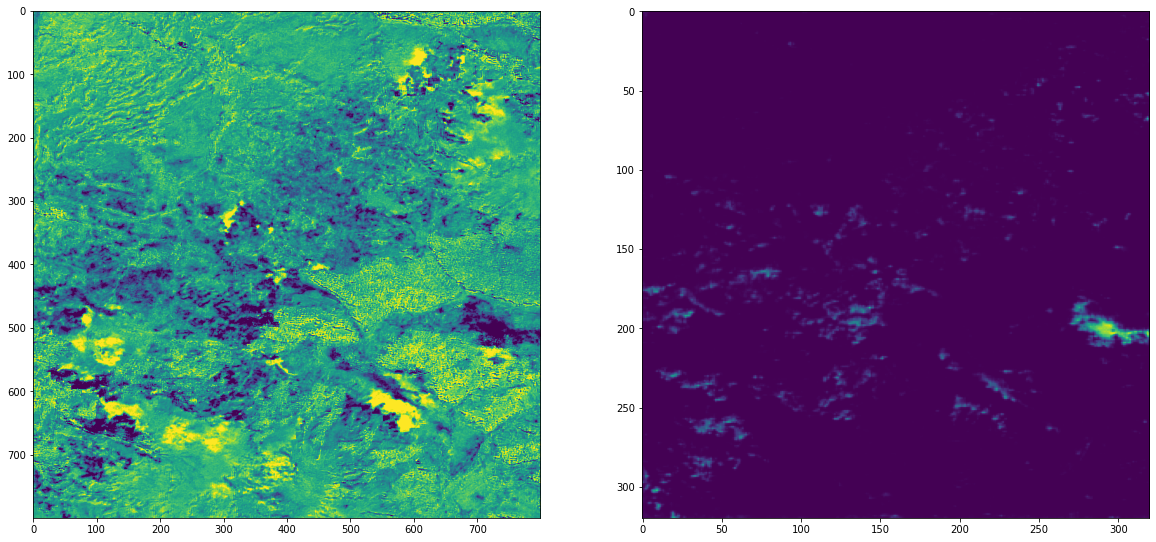

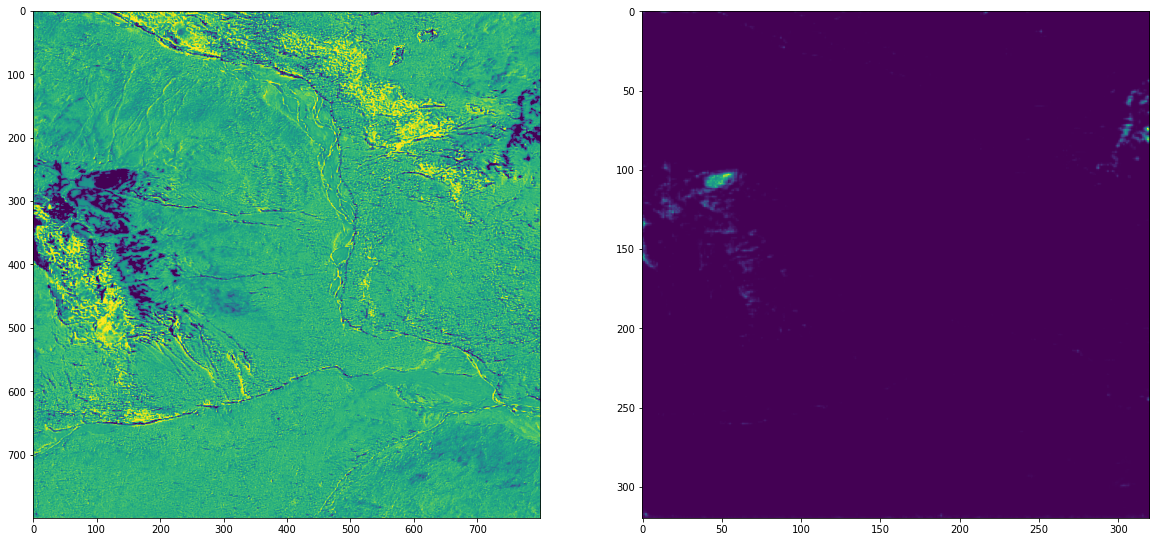

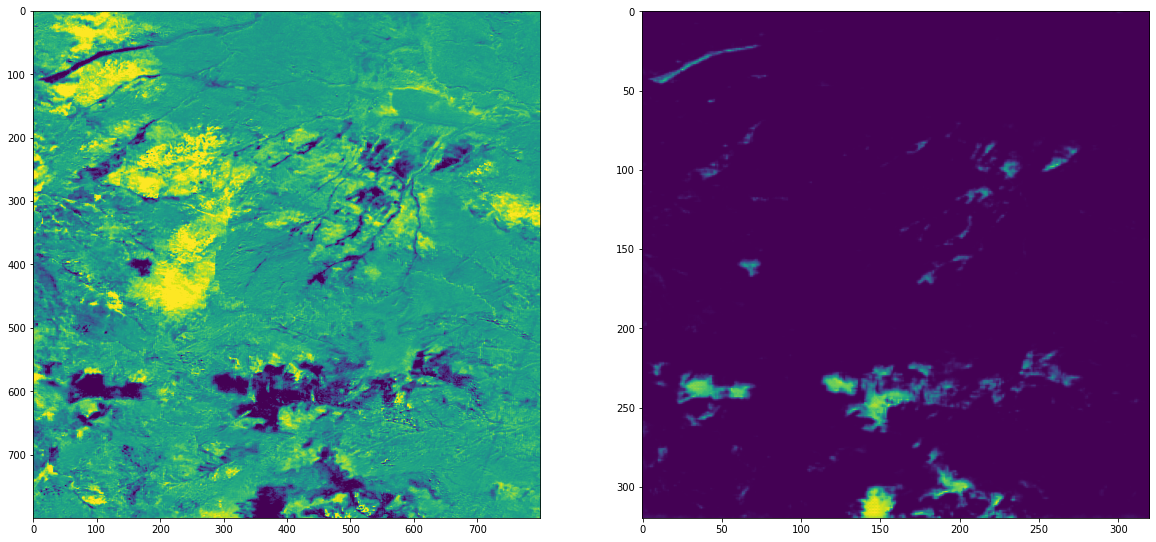

In [4]:
plot_data_results(predict_config=predict_config, num_samples=3, fig_size=(20,10))